<a href="https://colab.research.google.com/github/DeeeTeeee/Vodafone-Corporation---Classification-ML-Project/blob/master/Voda_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [319]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline


In [320]:
path = '/content/Telco-Customer-Churn.csv'
voda = pd.read_csv(path)
data.sample(5)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
5676,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,19.75,19.75,0,1 - 12
106,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,No,No,Yes,Yes,One year,Yes,Electronic check,104.15,7303.05,0,61 - 72
6932,Male,0,No,No,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),56.75,503.25,0,1 - 12
2201,Female,0,No,No,Yes,No,DSL,Yes,Yes,Yes,Yes,Yes,Yes,One year,No,Bank transfer (automatic),85.85,3003.55,0,25 - 36
2897,Male,0,No,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),26.45,1110.05,0,37 - 48


This is a telecommunications company's customer dataset, containing various demographic and usage information for each customer, as well as whether or not they have churned (i.e. cancelled their service). Here are the meanings of the columns:

- customerID: unique identifier for each customer
- gender: customer gender (Male/Female)
- SeniorCitizen: indicates if the customer is a senior citizen or not (1, 0)
- Partner: indicates if the customer has a partner or not (Yes, No)
- Dependents: indicates if the customer has dependents or not (Yes, No)
- tenure: number of months the customer has stayed with the company
- PhoneService: indicates if the customer has a phone service or not (Yes, No)
- MultipleLines: indicates if the customer has multiple lines or not (Yes, No, No phone service)
- InternetService: type of internet service the customer has (DSL, Fiber optic, No)
- OnlineSecurity: indicates if the customer has online security or not (Yes, No, No internet service)
- DeviceProtection: indicates if the customer has device protection or not (Yes, No, No internet service)
- TechSupport: indicates if the customer has tech support or not (Yes, No, No internet service)
- StreamingTV: indicates if the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies: indicates if the customer has streaming movies or not (Yes, No, No internet service)
- Contract: type of contract the customer has (Month-to-month, One year, Two year)
- PaperlessBilling: indicates if the customer has paperless billing or not (Yes, No)
- PaymentMethod: payment method used by the customer (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges: amount charged to the customer monthly
- TotalCharges: total amount charged to the customer
- Churn: indicates if the customer has churned or not (Yes, No)

In [321]:
voda.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [322]:
# Checking the data types of all the columns
voda.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [323]:
# Check the descriptive statistics of numeric variables
voda.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


SeniorCitizen is actually a categorical hence the 25%-50%-75% distribution is not propoer

75% customers have tenure less than 55 months

Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month

In [324]:
import plotly.express as px

churn_counts = voda['Churn'].value_counts().reset_index()
churn_counts.columns = ['Churn', 'Count']

fig = px.bar(churn_counts, x='Count', y='Churn', orientation='h', 
             color='Churn', text='Count', title="Count of TARGET Variable per category",
             color_discrete_sequence=['#1f77b4', '#aec7e8'])

fig.update_layout(xaxis_title="Count", yaxis_title="Target Variable",
                  yaxis=dict(categoryorder='total ascending'), 
                  margin=dict(l=100, r=20, t=50, b=50), height=400, showlegend=False)

fig.show()


In [325]:
100*voda['Churn'].value_counts()/len(voda['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [326]:
voda['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

 -  Data is highly imbalanced, ratio = 73:27
 
So we analyse the data with other features while taking the target values separately to get some insights

In [327]:
# Concise Summary of the dataframe, as we have too many columns, we are using the verbose = True mode
voda.info(verbose = True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [328]:
import plotly.express as px

missing = pd.DataFrame((voda.isnull().sum())*100/voda.shape[0]).reset_index()
missing.columns = ['Feature', 'Percentage Missing']

fig = px.line(missing, x='Feature', y='Percentage Missing', title="Percentage of Missing Values")
fig.update_layout(xaxis_title="Feature", yaxis_title="Percentage Missing")
fig.show()

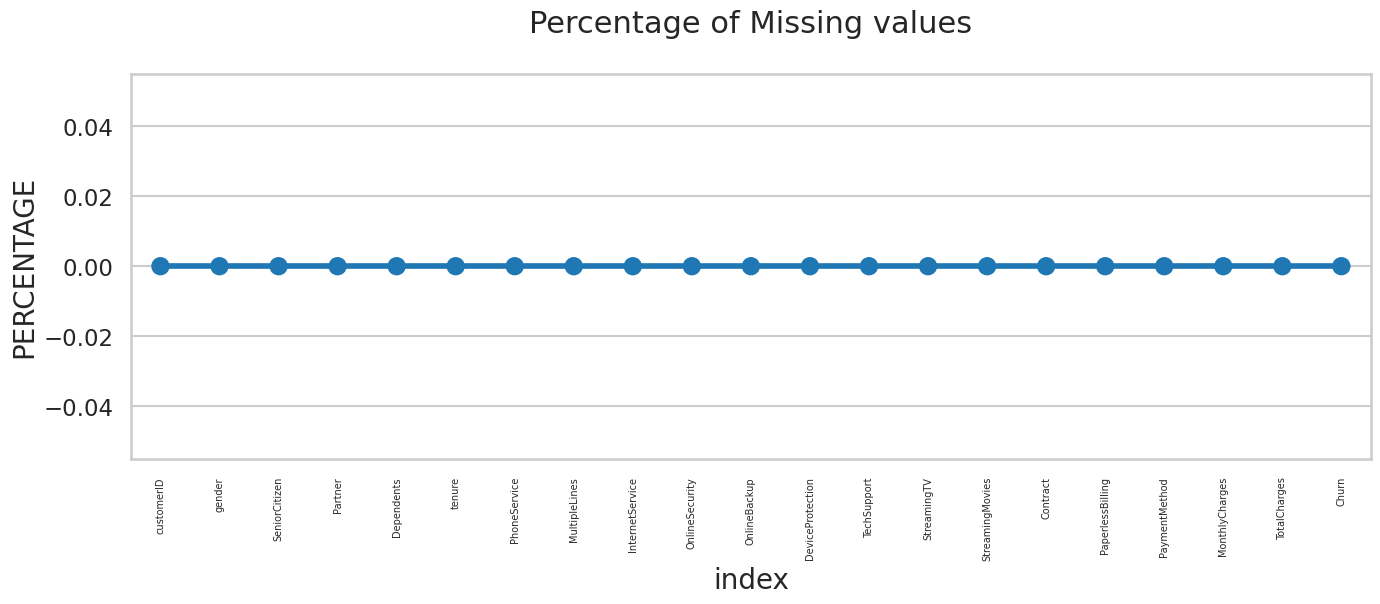

In [329]:
missing = pd.DataFrame((voda.isnull().sum())*100/voda.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index', y=0, data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

### Data Cleaning

1. Create a copy of base data for manupulation & processing

In [330]:
data = voda.copy()

2. Total Charges should be numeric amount. Let's convert it to numerical data type

In [331]:
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

3. As we can see there are 11 missing values in TotalCharges column. Let's check these records

In [332]:
data.loc[data ['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


4. Missing Value Treatement

Since the % of these records compared to total dataset is very low ie 0.15%, it is safe to ignore them from further processing.

In [333]:
data['TotalCharges'] = data['TotalCharges'].fillna(0)
#Removing missing values 
#data.dropna(how = 'any', inplace = True)

5. Divide customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24; so on...

In [334]:
# Get the max tenure
print(data['tenure'].max()) #72

72


In [335]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

data['tenure_group'] = pd.cut(data.tenure, range(1, 80, 12), right=False, labels=labels)
data['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

6. Remove columns not required for processing

In [336]:
#drop column customerID and tenure
data.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


# Data Exploration
1. Plot distibution of individual predictors by churn

## Univariate Analysis

In [341]:

for i, predictor in enumerate(data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    fig = px.histogram(data, x=predictor, color='Churn', barmode='group',
                       color_discrete_sequence=['#1f77b4', '#aec7e8'],
                       title=f"Countplot of {predictor} by Churn")
    fig.update_layout(xaxis_title=predictor, yaxis_title="Count",
                      legend_title="Churn", height=400)
    fig.show()


In [343]:

# loop through all columns except 'Churn', 'TotalCharges', and 'MonthlyCharges'
for col in data.columns:
    if col not in ['Churn', 'TotalCharges', 'MonthlyCharges']:
        # create a bar chart with counts of each category and color by churn
        fig = px.histogram(data, x=col, color='Churn', barmode='group', title=col)
        fig.update_layout(
            xaxis_title=col,
            yaxis_title='Count',
            font=dict(size=12),
            margin=dict(l=50, r=50, t=50, b=50),
            showlegend=True,
            legend=dict(title='Churn', orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1)
        )
        fig.update_traces(opacity=0.75)
        fig.show()


2. Convert the target variable 'Churn' in a binary numeric variable i.e. Yes=1 ; No = 0

In [344]:
data['Churn'] = np.where(data.Churn == 'Yes',1,0)
data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


3. Convert all the categorical variables into dummy variables

In [345]:
data_dummies = pd.get_dummies(data)
data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


9. Relationship between Monthly Charges and Total Charges

In [346]:

fig = px.scatter(data_frame=data_dummies, x='MonthlyCharges', y='TotalCharges', 
                 trendline='ols', color='Churn', title='Monthly Charges vs Total Charges')

fig.update_layout(xaxis_title='Monthly Charges', yaxis_title='Total Charges',
                  margin=dict(l=50, r=50, t=50, b=50), height=400)

fig.show()


Total Charges increase as Monthly Charges increase - as expected.

10. Churn by Monthly Charges and Total Charges

In [347]:
print(len(data_dummies.MonthlyCharges[(data_dummies["Churn"] == 1)]))
print(len(data_dummies.MonthlyCharges[(data_dummies["Churn"] == 0)]))


1869
5174


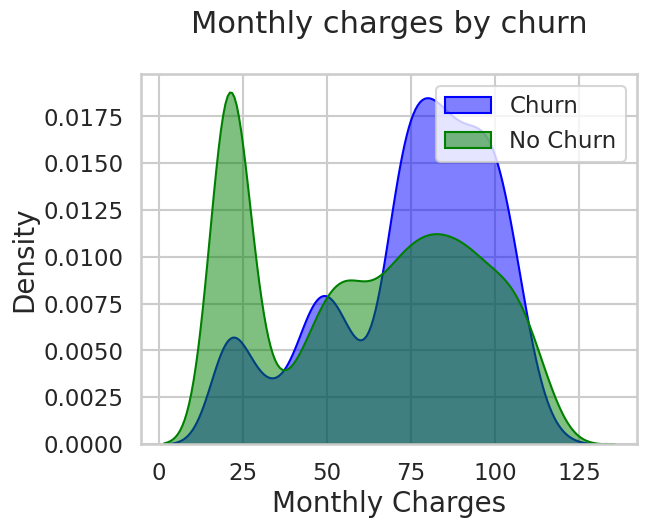

In [348]:
Mth_Chgs = sns.kdeplot(data_dummies.MonthlyCharges[(data_dummies["Churn"] == 1) ],
                color="Blue", fill = True, alpha=.5)
Mth_Chgs = sns.kdeplot(data_dummies.MonthlyCharges[(data_dummies["Churn"] == 0) ],
                ax =Mth_Chgs, color="Green", fill= True, alpha=.5)

Mth_Chgs.legend(["Churn", "No Churn"],loc='upper right')
Mth_Chgs.set_ylabel('Density')
Mth_Chgs.set_xlabel('Monthly Charges')
Mth_Chgs.set_title('Monthly charges by churn')

plt.show()


Insight: Churn is high when Monthly Charges ar high

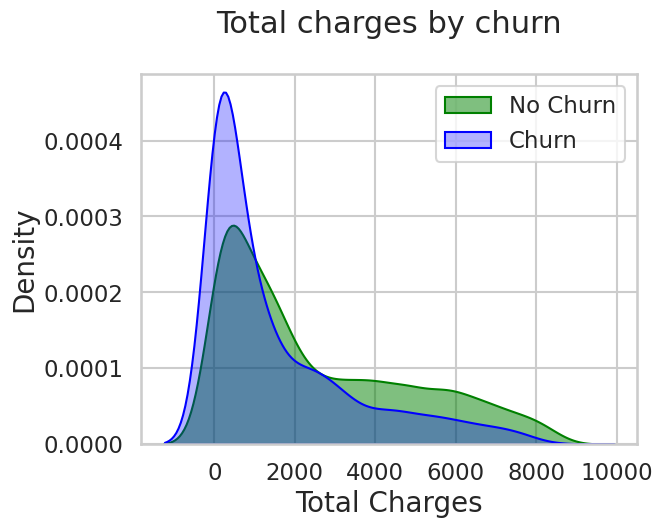

In [349]:
tot_Chgs = sns.kdeplot(data_dummies.TotalCharges[(data_dummies["Churn"] == 0) ],
                color="Green", fill=True, alpha=.5)
tot_Chgs = sns.kdeplot(data_dummies.TotalCharges[(data_dummies["Churn"] == 1) ],
                ax =tot_Chgs, color="Blue", fill=True, alpha=.3)
tot_Chgs.legend(["No Churn","Churn"],loc='upper right')
tot_Chgs.set_ylabel('Density')
tot_Chgs.set_xlabel('Total Charges')
tot_Chgs.set_title('Total charges by churn');


Higher Churn at lower Total Charges

But if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz **Higher** Monthly Charge, **Lower** tenure and **Lower** Total Charge are linkd to **High Churn**

11. Build a corelation of all predictors with 'Churn'

In [350]:
import plotly.express as px

corr = data_dummies.corr()['Churn'].sort_values(ascending=False).reset_index()
corr.columns = ['Feature', 'Correlation']

fig = px.bar(corr, x='Feature', y='Correlation', color='Correlation', 
             color_continuous_scale='OrRd', title='Correlation with Churn')
fig.update_layout(width=1200, height=750)
fig.show()

Derived Insight:

**HIGH** Churn seen in case of **Month to month contracts**, **No online security, No Tech support, First year of subscription** and **Fibre Optics Internet**

**LOW** Churn is seens in case of **Long term contracts, Subscriptions without internet service** and **The customers engaged for 5+ years**



Lets see it better in the Heatmap below:

In [351]:
import plotly.graph_objs as go

corr = data_dummies.corr()

fig = go.Figure(
    data=go.Heatmap(
        z=corr.values,
        x=corr.columns,
        y=corr.columns,
        colorscale='RdBu',
        zmin=-1,
        zmax=1,
        colorbar=dict(title='Correlation')
    )
)

fig.update_layout(
    title='Correlation Matrix',
    width=1000,
    height=700,
    xaxis=dict(side='top')
)

fig.show()


### Bivariate Analysis

In [352]:
target_0= data.loc[data["Churn"]==0]
target_1= data.loc[data["Churn"]==1]

In [353]:
def uniplot(df, col, title, hue=None):
    fig = px.histogram(df, x=col, color=hue, barmode='group', 
                       category_orders={col: df[col].value_counts().index}, 
                       color_discrete_sequence=['#1f77b4', '#aec7e8'])
    fig.update_layout(title=title, xaxis_title=col, yaxis_title='Count', legend_title=hue)
    fig.show()

uniplot(target_1, col='Partner', title='Distribution of Gender for Churned Customers', hue='gender')


In [354]:


def uniplot(df, col, title, hue=None):
    fig = px.histogram(df, x=col, color=hue, barmode='group',
                       category_orders={col: sorted(df[col].unique())},
                       color_discrete_sequence=['#1f77b4', '#aec7e8'])
    fig.update_layout(title=title, xaxis_title=col, yaxis_title='Count')
    fig.show()

uniplot(target_0, col='Partner', title='Distribution of Gender for Churned Customers', hue='gender')



In [355]:
uniplot(target_1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

In [356]:
uniplot(target_1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

In [357]:
uniplot(target_1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

In [358]:
uniplot(target_1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

**CONCLUSION**
These are some of the quick insights from this exercise:

  - Electronic check medium are the highest churners
  - Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
  - No Online security, No Tech Support category are high churners
  - Non senior Citizens are high churners


In [359]:
data_dummies.to_csv('data_churn.csv')

In [360]:
import plotly.express as px

gender_count = data['gender'].value_counts()

fig = px.bar(gender_count, x=gender_count.index, y=gender_count.values, labels={'x': 'Gender', 'y': 'Count'})
fig.update_layout(title='Distribution of Gender in Customer Base')

fig.show()


In [361]:


# Group by churn and calculate the mean of tenure
churn_tenure = data.groupby('Churn')['tenure'].mean()

# Print the result
print(churn_tenure)


KeyError: ignored

In [ ]:

from scipy.stats import chi2_contingency

# Create contingency table
cont_table = pd.crosstab(data['Dependents'], data['Churn'])

# Perform chi-square test for independence
chi2, pval, dof, expected = chi2_contingency(cont_table)
print('Chi-square test statistic:', chi2)
print('p-value:', pval)


In [ ]:
import plotly.express as px

# calculate the percentage of customers with internet service
internet_customers = data[data["InternetService"] != "No"]
internet_percent = len(internet_customers) / len(data) * 100

# count the number of customers for each internet service type
internet_types = internet_customers["InternetService"].value_counts()

# create a pie chart to display the results
fig = px.pie(values=internet_types, names=internet_types.index, title="Types of Internet Service")
fig.show()

print("Percentage of customers with internet service: {:.2f}%".format(internet_percent))


In [ ]:

# Group by paperless billing and calculate the churn rate
billing_churn = data.groupby("PaperlessBilling")["Churn"].value_counts(normalize=True).mul(100).rename("Percentage").reset_index()

# Filter for only churned customers
billing_churn = billing_churn[billing_churn["Churn"] == "Yes"]

# Create a bar plot to visualize the result
fig = px.bar(billing_churn, x="PaperlessBilling", y="Percentage", color="Churn", 
             title="Churn rate by paperless billing")
fig.show()
